<a href="https://colab.research.google.com/github/P4lms/EDA_Remuneracao_Serv_Pub_SP/blob/main/Remunera%C3%A7%C3%A3o_Serv_Pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

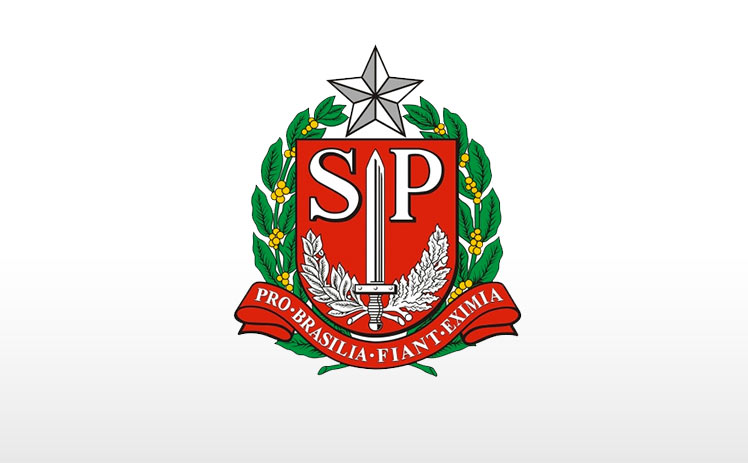

# Importando bibliotecas

In [ ]:
%matplotlib inline
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
!pip3 install --upgrade plotly
import math
 
import warnings
warnings.filterwarnings('ignore')

# Lendo e limpando os dados do dataframe

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Servidores_Publicos/remuneracao.txt', sep=';', encoding='latin-1', low_memory=False)

In [110]:
df.head(3)

,NOME,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$)
0,AAIRON TELES DE CAMARGO,OFICIAL ADMINISTRATIVO,DETRAN,ATIVOS,"2601,32","68,65","458,09","0,00","177,35","0,00","2009,74"
1,AALAN DA SILVA ARAUJO,SD 1C PM,PM,ATIVOS,"3667,57","0,00","0,00","0,00","441,76","0,00","2418,36"
2,AARAN ESTEVAO LIMA BARBOSA,1TEN PM,PM,ATIVOS,"11479,11","0,00","0,00","0,00","607,42","0,00","6254,95"


In [111]:
print(f'O dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataframe contém 1079494 linhas e 11 colunas


In [112]:
df.dtypes

NOME                                       object
CARGO                                      object
ORGÃO                                      object
SITUAÇÃO                                   object
REMUNERAÇÃO DO MÊS                         object
FÉRIAS E 13º SALÁRIO                       object
PAGAMENTOS EVENTUAIS                       object
LICENÇA PRÊMIO INDENIZADA                  object
ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES    object
REDUTOR SALARIAL                           object
TOTAL LIQUÍDO (R$)                         object
dtype: object

### Convertendo o tipo de dado da coluna Total Líquido

In [113]:
df['TOTAL LIQUÍDO (R$)'] = df['TOTAL LIQUÍDO (R$)'].astype(str)

In [114]:
df['TOTAL LIQUÍDO (R$)'] = df['TOTAL LIQUÍDO (R$)'].apply(lambda x: x.replace(',','.'))

In [115]:
df.head(3)

,NOME,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$)
0,AAIRON TELES DE CAMARGO,OFICIAL ADMINISTRATIVO,DETRAN,ATIVOS,"2601,32","68,65","458,09","0,00","177,35","0,00",2009.74
1,AALAN DA SILVA ARAUJO,SD 1C PM,PM,ATIVOS,"3667,57","0,00","0,00","0,00","441,76","0,00",2418.36
2,AARAN ESTEVAO LIMA BARBOSA,1TEN PM,PM,ATIVOS,"11479,11","0,00","0,00","0,00","607,42","0,00",6254.95


In [116]:
df['TOTAL LIQUÍDO (R$)'] = df['TOTAL LIQUÍDO (R$)'].astype(float)

In [117]:
df.dtypes

NOME                                        object
CARGO                                       object
ORGÃO                                       object
SITUAÇÃO                                    object
REMUNERAÇÃO DO MÊS                          object
FÉRIAS E 13º SALÁRIO                        object
PAGAMENTOS EVENTUAIS                        object
LICENÇA PRÊMIO INDENIZADA                   object
ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES     object
REDUTOR SALARIAL                            object
TOTAL LIQUÍDO (R$)                         float64
dtype: object

### Identificando possibilidades de haver dados faltando

In [118]:
df.isna().any() # Verificando a possibilidade de haver dados faltantes no dataframe

NOME                                       False
CARGO                                       True
ORGÃO                                      False
SITUAÇÃO                                   False
REMUNERAÇÃO DO MÊS                         False
FÉRIAS E 13º SALÁRIO                       False
PAGAMENTOS EVENTUAIS                       False
LICENÇA PRÊMIO INDENIZADA                  False
ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES    False
REDUTOR SALARIAL                           False
TOTAL LIQUÍDO (R$)                         False
dtype: bool

In [119]:
df_clean = df.dropna() # Retirando as linhas que continham dados faltantes por ser uma quantidade bem pequena

In [120]:
def diferenca_nan():
    return df.shape[0] - df_clean.shape[0]

print(f'''O dataframe com os "missing values" faltando agora contém {df_clean.shape[0]} linhas
A diferença é de {diferenca_nan()} linhas que foram retiradas''')

O dataframe com os "missing values" faltando agora contém 1079466 linhas
A diferença é de 28 linhas que foram retiradas


In [121]:
df_clean['ORGÃO'].value_counts()

SPPREV                            491460
EDUCACAO                          230711
PM                                 82192
SAA                                46896
SAUDE                              41098
                                   ...  
DEPTO.AGUAS ENER.ELETRICA-DAEE         7
CODASP                                 6
AGEMVALE                               5
IPESP                                  2
GAB GOV                                1
Name: ORGÃO, Length: 82, dtype: int64

### Criando um novo grupo com informações necessárias para o uso em gráficos mais a frente

In [122]:
df_maior_5000 = df_clean[df_clean['TOTAL LIQUÍDO (R$)'] > 5000]
df_maior_5000.head(3)

,NOME,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$)
2,AARAN ESTEVAO LIMA BARBOSA,1TEN PM,PM,ATIVOS,"11479,11","0,00","0,00","0,00","607,42","0,00",6254.95
3,AARAO DE OLIVEIRA,MAJ PM,SPPREV,APOSENTADOS,"15064,60","0,00","273,95","0,00","0,00","0,00",13684.79
5,AARON EMMANUEL PARONETTO CAETA,ASPOF PM,PM,ATIVOS,"6712,55","0,00","0,00","0,00","828,30","0,00",5261.16


In [123]:
grupo = df_maior_5000.groupby(['ORGÃO', 'NOME', 'CARGO'])['TOTAL LIQUÍDO (R$)'].sum()

In [124]:
type(grupo)

pandas.core.series.Series

In [125]:
dfgrp = grupo.to_frame()

In [126]:
type(dfgrp)

pandas.core.frame.DataFrame

# Primeiras análises visuais sobre os dados

Depois dos dados tratados conseguimos ver que temos uma grande quantidade de funcionários trabalhando em alguns órgãos dentro do Estado de São Paulo.
Vamos separar os 10 órgãos com a maior quantidade de funcionários e depois analisar a remuneração deles.

In [127]:
df_clean['ORGÃO'].value_counts().head(10)

SPPREV                            491460
EDUCACAO                          230711
PM                                 82192
SAA                                46896
SAUDE                              41098
ADM GERAL                          35390
SSP                                30397
CEETEPS                            18812
COM.SAN.BAS.EST.S.PAULO SABESP     16983
HCFMUSP                            15436
Name: ORGÃO, dtype: int64

### Gráfico dos 10 órgãos com a maior quantidade de funcionários

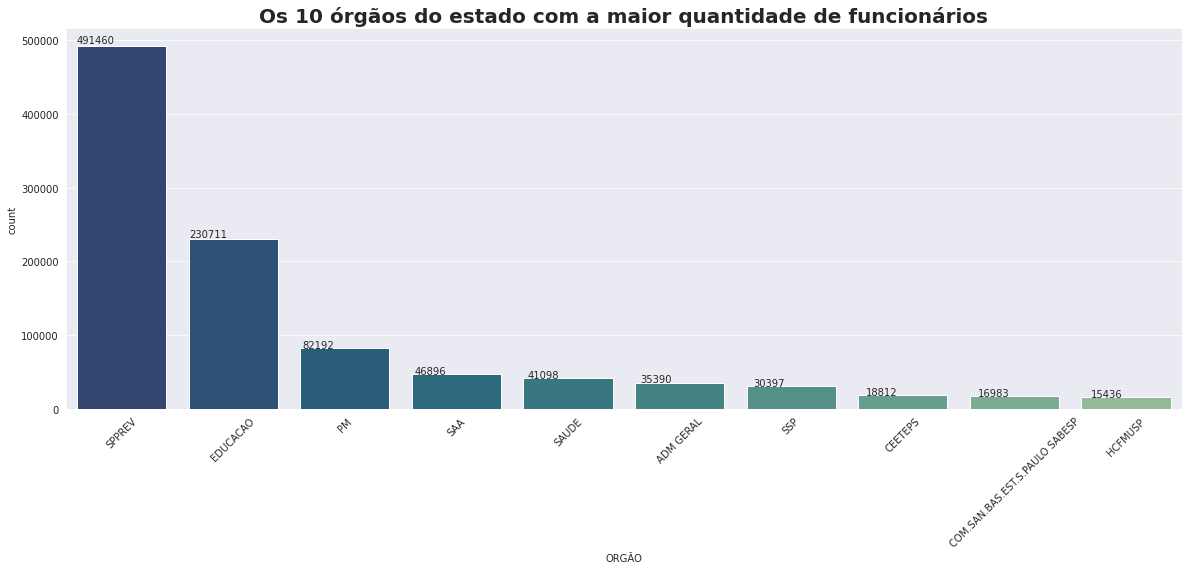

In [128]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,7))
ax = sns.countplot(df_clean['ORGÃO'], order = df_clean['ORGÃO'].value_counts().head(10).index, palette='crest_r')
plt.title('Os 10 órgãos do estado com a maior quantidade de funcionários', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, (p.get_height() * 1.01)))
plt.show()

A grande maioria dos funcionários públicos são beneficiários da previdência, seguindo de professores e profissionais da educação e depois funcionários da Polícia Militar.
Iremos analisar a quantidade de pessoas que recebem mais que R$5.000,00 nos seis primeiros órgãos com a maior quantidade de servidores.

In [129]:
spprev = dfgrp.loc['SPPREV']
educ = dfgrp.loc['EDUCACAO']
pm = dfgrp.loc['PM']
saa = dfgrp.loc['SAA']
saude = dfgrp.loc['SAUDE']
admg = dfgrp.loc['ADM GERAL']

In [130]:
fig = go.Figure()
fig.add_trace(go.Bar(x=['SPPREV'],
                     y=spprev.count(),
                     name='SPPREV',
                     marker_color='rgb(82, 0, 255)'))
fig.add_trace(go.Bar(x=['PM'],
                     y=pm.count(),
                     name='PM',
                     marker_color='rgb(82, 79, 255)'))
fig.add_trace(go.Bar(x=['ADM GERAL'],
                     y=admg.count(),
                     name='ADM GERAL',
                     marker_color='rgb(82, 94, 255)'))
fig.add_trace(go.Bar(x=['EDUCACAO'],
                     y=educ.count(),
                     name='EDUCACAO',
                     marker_color='rgb(82, 146, 255)'))
fig.add_trace(go.Bar(x=['SAUDE'],
                     y=saude.count(),
                     name='SAUDE',
                     marker_color='rgb(82, 193, 255)'))
fig.add_trace(go.Bar(x=['SAA'],
                     y=saa.count(),
                     name='SAA',
                     marker_color='rgb(82, 241, 255)'))



fig.update_layout(
    title='Quantidade de servidores por órgão que recebem mais que R$5.000,00',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Servidores',
        titlefont_size=16,
        tickfont_size=16,
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1,
    bargroupgap=0.1
)

fig.show()


 ### Encontrando a mediana dos valores totais por órgão

In [131]:
grupo1 = df_clean.groupby(['ORGÃO', 'CARGO', 'NOME'])['TOTAL LIQUÍDO (R$)'].sum()

In [132]:
d = {'SPPREV': pd.Series(grupo1.loc['SPPREV'].median(), index=['Mediana']),
     'EDUCACAO': pd.Series(grupo1.loc['EDUCACAO'].median(), index=['Mediana']),
     'PM': pd.Series(grupo1.loc['PM'].median(), index=['Mediana']),
     'SAA': pd.Series(grupo1.loc['SAA'].median(), index=['Mediana']),
     'SAUDE': pd.Series(grupo1.loc['SAUDE'].median(), index=['Mediana']),
     'ADM GERAL': pd.Series(grupo1.loc['ADM GERAL'].median(), index=['Mediana'])
     }
mediana = pd.DataFrame(d)
mediana

,SPPREV,EDUCACAO,PM,SAA,SAUDE,ADM GERAL
Mediana,2935.84,2271.0,3789.61,2704.79,2905.83,2508.98


 A mediana indica que todos os outros valores estão acima ou abaixo dela


### Gráfico de proporção separados por situação dos funcionários públicos

In [133]:
fig = px.sunburst(
    data_frame = df_clean,
    path=['SITUAÇÃO', 'ORGÃO', 'CARGO'],
    color='SITUAÇÃO',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    #range_color=[1, 2],
    maxdepth=2,
    branchvalues='total',
    #hover_data={'CARGO': False},
    title='Gráfico de proporção dos cargos separados por situação',
    template='ggplot2'
)
fig.update_traces(textinfo='label+percent parent')
#fig.update_layout(margin=dict(t=0.5, l=0,r=0,b=0))
fig.show()

# Lei de Newcomb-Benford:


*   Fórmula matemática, definição e aplicação da LNB
*   Visualização de gráficos utilizando o modelo e identificação de possíveis situações no remuneramento dos servidores públicos que divergem do modelo de Benford



### Fórmula da Lei de Benford e aplicação do modelo

$$log_{10}\left ( 1 + \frac{1}{d} \right )
$$

De acordo com o artigo brasileiro [A Lei de Benford e a transparência: uma análise das despesas públicas municipais](http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1808-23862018000400331&lng=en&nrm=iso&tlng=pt), a Lei de Benford pode ser descrita como:

     "A Lei de Benford foi originalmente descrita pelo astrônomo e matemático canadense-americano Simon Newcomb, em 1881,
      quando este percebeu que as tabelas de logaritmos tinham desgaste maior nas primeiras do que nas últimas páginas, isto é,
       a frequência de uso diminuía à medida que os números se aproximavam de nove.
      Assim, Newcomb (1881) foi bem sucedido em estabelecer uma relação de probabilidade de ocorrência
       do primeiro e segundo dígitos associados ao uso das tabelas de logaritmos."

### Definindo as funções que vão calcular e plotar os gráficos da LNB

In [134]:
# Função que retorna somente o primeiro digito
def primeiro_digito(numero):
    return str(numero)[0]

# Função que calcula a frequência de Benford
def freq_benford():
    d = 1
    return [math.log10(1 + 1/d) for d in range(1, 10)]

# Função que calcula a frequência da coluna
def freq_real(coluna):
    serie = coluna
    primeiros_digitos = serie.apply(primeiro_digito)
    filtro_n_zero = primeiros_digitos != '0'
    freq = primeiros_digitos.loc[filtro_n_zero].value_counts(True)
    return freq

# Função que plota a comparação das duas frequências
def benford(coluna):
    df_benford = pd.DataFrame(index = [ str(i) for i in range(1, 10)])
    df_benford['Real'] = freq_real(coluna)
    df_benford['Esperado'] = freq_benford()

    x = [str(i) for i in range(1, 10)]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = x,
        y = df_benford['Real'],
        name='Dados',
        marker_color='rgb(255, 35, 78)',
        text =  df_benford['Real']
    ))
    fig.add_trace(go.Bar(
        x = x,
        y = df_benford['Esperado'],
        name='Benford',
        marker_color='rgb(55, 83, 109)',
        text = df_benford['Esperado']
    ))
    fig.update_layout(
        title = 'Frequência de Benford vs Frequência dos dados', 
        xaxis_tickfont_size = 14,
        yaxis = dict(
            title = 'Proporção',
            titlefont_size = 14,
            tickfont_size = 12
        ),
        legend = dict(
            x = 0.9,
            y = 1.0,
            bgcolor = 'rgba(255, 255, 255, 0)',
            bordercolor = 'rgba(255, 255, 255, 0)'
        ),
        barmode = 'group',
        bargap = 0.1,
        bargroupgap = 0.1
    )
    fig.update_traces(
        texttemplate = '%{text: .3f}',
        textposition = 'outside',
    )
    fig.show()

# Função que retorna somente os dois primeiros digitos
def dois_prim_dig(numero):
    return str(numero)[:2]

# Função que calcula a frequência de Benford para dois digitos
def freq_benford_dois_d():
    d = 1
    return [math.log10(1 + 1/d) for d in range(10, 100)]

# Função que calcula a frequência longa da coluna
def freq_longa_real(coluna):
    serie = coluna
    dois_primeiros_digitos = serie.apply(dois_prim_dig)
    filtro_n_zero = dois_primeiros_digitos != '0'
    freq = dois_primeiros_digitos.loc[filtro_n_zero].value_counts(True)
    return freq

def benford_dois_digitos(coluna):
    df_benford_long = pd.DataFrame(index = [ str(i) for i in range(10, 100)])
    df_benford_long['Real'] = freq_longa_real(coluna)
    df_benford_long['Esperado'] = freq_benford_dois_d()

    x = [str(i) for i in range(10, 100)]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = x,
        y = df_benford_long['Real'],
        name='Dados',
        marker_color='rgb(255, 35, 78)',
        text =  df_benford_long['Real']
    ))
    fig.add_trace(go.Bar(
        x = x,
        y = df_benford_long['Esperado'],
        name='Benford',
        marker_color='rgb(55, 83, 109)',
        text = df_benford_long['Esperado']
    ))
    fig.update_layout(
        title = 'Frequência de Benford vs Frequência dos dados', 
        xaxis_tickfont_size = 11,
        yaxis = dict(
            title = 'Proporção',
            titlefont_size = 14,
            tickfont_size = 12
        ),
        legend = dict(
            x = 0.9,
            y = 1.0,
            bgcolor = 'rgba(255, 255, 255, 0)',
            bordercolor = 'rgba(255, 255, 255, 0)'
        ),
        barmode = 'group',
        bargap = 0.1,
        bargroupgap = 0.1
    )
    fig.update_traces(
        texttemplate = '%{text: .3f}',
        textposition = 'outside',
    )
    fig.show()

### Visualização gráfica da comparação entre frequências de Benford e dos Dados

In [135]:
print(benford(df_clean['TOTAL LIQUÍDO (R$)']))
print(benford_dois_digitos(df_clean['TOTAL LIQUÍDO (R$)']))

None


None


In [136]:
print(benford(df_clean['REMUNERAÇÃO DO MÊS']))
print(benford_dois_digitos(df_clean['REMUNERAÇÃO DO MÊS']))

None


None


# Conclusão



* Identificamos algumas divergências tanto nas colunas de Total como na coluna de Remuneração do Mês, caberia aqui uma análise mais aprofundada com técnicas estatísticas e matemáticas para termos uma ideia melhor sobre o motivo dessas interferências terem ocorrido.


